In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Adultincome.csv')
df.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

In [4]:
df = pd.read_csv('Adultincome.csv')
df.head(3000)

age  workclass  fnlwgt     education  educational-num  \
0      25    Private  226802          11th                7   
1      38    Private   89814       HS-grad                9   
2      28  Local-gov  336951    Assoc-acdm               12   
3      44    Private  160323  Some-college               10   
4      18          ?  103497  Some-college               10   
...   ...        ...     ...           ...              ...   
2994   25    Private  120268       HS-grad                9   
2995   22          ?   60331  Some-college               10   
2996   59    Private  172618  Some-college               10   
2997   36  State-gov  173273       Masters               14   
2998   25    Private   52921    Assoc-acdm               12   

          marital-status         occupation   relationship   race  gender  \
0          Never-married  Machine-op-inspct      Own-child  Black    Male   
1     Married-civ-spouse    Farming-fishing        Husband  White    Male   
2     Married-civ-spouse    Protective-serv        Husband  White    Male   
3     Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4          Never-married                  ?      Own-child  White  Female   
...                  ...                ...            ...    ...     ...   
2994       Never-married              Sales      Own-child  White    Male   
2995  Married-civ-spouse                  ?        Husband  White    Male   
2996            Divorced              Sales  Not-in-family  White    Male   
2997       Never-married     Prof-specialty  Not-in-family  Black  Female   
2998  Married-civ-spouse              Sales        Husband  White    Male   

      capital-gain  capital-loss  hours-per-week native-country income  
0                0             0              40  United-States  <=50K  
1                0             0              50  United-States  <=50K  
2                0             0              40  United-States   >50K  
3             7688             0              40  United-States   >50K  
4                0             0              30  United-States  <=50K  
...            ...           ...             ...            ...    ...  
2994             0          1741              40  United-States  <=50K  
2995             0             0              10  United-States  <=50K  
2996             0             0              56  United-States  <=50K  
2997             0             0              40  United-States  <=50K  
2998             0             0              45  United-States  <=50K  

[2999 rows x 15 columns]

In [5]:
df.shape

(2999, 15)

In [6]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.nunique()

age                  69
workclass             8
fnlwgt             2843
education            16
educational-num      16
marital-status        7
occupation           15
relationship          6
race                  5
gender                2
capital-gain         73
capital-loss         45
hours-per-week       72
native-country       38
income                2
dtype: int64

In [9]:
df.describe(include='object')

workclass education      marital-status      occupation relationship  \
count       2999      2999                2999            2999         2999   
unique         8        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq        2031       949                1378             397         1222   

         race gender native-country income  
count    2999   2999           2999   2999  
unique      5      2             38      2  
top     White   Male  United-States  <=50K  
freq     2562   2014           2710   2274

In [10]:
df.describe().T

count           mean            std      min       25%  \
age              2999.0      38.508169      13.701083     17.0      27.0   
fnlwgt           2999.0  186873.875625  100986.223865  13769.0  115433.5   
educational-num  2999.0      10.065022       2.641482      1.0       9.0   
capital-gain     2999.0    1277.111704    8473.267628      0.0       0.0   
capital-loss     2999.0      87.442481     402.379850      0.0       0.0   
hours-per-week   2999.0      40.341781      12.296003      1.0      40.0   

                      50%       75%       max  
age                  37.0      47.0      90.0  
fnlwgt           177543.0  234907.0  914061.0  
educational-num      10.0      13.0      16.0  
capital-gain          0.0       0.0   99999.0  
capital-loss          0.0       0.0    3004.0  
hours-per-week       40.0      45.0      99.0

In [11]:
df.describe()

age         fnlwgt  educational-num  capital-gain  \
count  2999.000000    2999.000000      2999.000000   2999.000000   
mean     38.508169  186873.875625        10.065022   1277.111704   
std      13.701083  100986.223865         2.641482   8473.267628   
min      17.000000   13769.000000         1.000000      0.000000   
25%      27.000000  115433.500000         9.000000      0.000000   
50%      37.000000  177543.000000        10.000000      0.000000   
75%      47.000000  234907.000000        13.000000      0.000000   
max      90.000000  914061.000000        16.000000  99999.000000   

       capital-loss  hours-per-week  
count   2999.000000     2999.000000  
mean      87.442481       40.341781  
std      402.379850       12.296003  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     3004.000000       99.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2999 non-null   int64 
 1   workclass        2999 non-null   object
 2   fnlwgt           2999 non-null   int64 
 3   education        2999 non-null   object
 4   educational-num  2999 non-null   int64 
 5   marital-status   2999 non-null   object
 6   occupation       2999 non-null   object
 7   relationship     2999 non-null   object
 8   race             2999 non-null   object
 9   gender           2999 non-null   object
 10  capital-gain     2999 non-null   int64 
 11  capital-loss     2999 non-null   int64 
 12  hours-per-week   2999 non-null   int64 
 13  native-country   2999 non-null   object
 14  income           2999 non-null   object
dtypes: int64(6), object(9)
memory usage: 351.6+ KB


In [13]:
df['workclass'].value_counts()

workclass
Private             2031
Self-emp-not-inc     236
?                    184
Local-gov            181
State-gov            152
Self-emp-inc         115
Federal-gov           99
Without-pay            1
Name: count, dtype: int64

In [14]:
df['occupation'].value_counts()

occupation
Prof-specialty       397
Exec-managerial      393
Craft-repair         367
Sales                333
Adm-clerical         330
Other-service        284
Machine-op-inspct    193
?                    184
Transport-moving     138
Handlers-cleaners    124
Tech-support          85
Farming-fishing       83
Protective-serv       64
Priv-house-serv       23
Armed-Forces           1
Name: count, dtype: int64

In [15]:
df['native-country'].value_counts()

native-country
United-States         2710
Mexico                  65
?                       48
Philippines             19
Germany                 14
Puerto-Rico             13
India                   11
El-Salvador              9
South                    9
Canada                   8
Dominican-Republic       8
Haiti                    8
Cuba                     7
England                  7
China                    6
Poland                   5
Columbia                 5
Iran                     4
Thailand                 4
Vietnam                  3
Jamaica                  3
Italy                    3
Portugal                 3
Nicaragua                3
Peru                     2
Hungary                  2
Yugoslavia               2
Ecuador                  2
Scotland                 2
Greece                   2
Honduras                 2
Guatemala                2
Taiwan                   2
Ireland                  2
Laos                     1
Cambodia                 1
Hong         

In [16]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       1378
Never-married            1003
Divorced                  385
Widowed                   102
Separated                  96
Married-spouse-absent      32
Married-AF-spouse           3
Name: count, dtype: int64

In [17]:
df['gender'].value_counts()

gender
Male      2014
Female     985
Name: count, dtype: int64

In [18]:
df['race'].value_counts()

race
White                 2562
Black                  292
Asian-Pac-Islander      89
Amer-Indian-Eskimo      33
Other                   23
Name: count, dtype: int64

In [19]:
df['income'].value_counts()

income
<=50K    2274
>50K      725
Name: count, dtype: int64

In [20]:
df['education'].value_counts()

education
HS-grad         949
Some-college    657
Bachelors       514
Masters         181
11th            120
Assoc-voc       116
10th             99
Assoc-acdm       88
7th-8th          64
Prof-school      52
9th              45
5th-6th          39
Doctorate        31
12th             23
1st-4th          13
Preschool         8
Name: count, dtype: int64

In [21]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

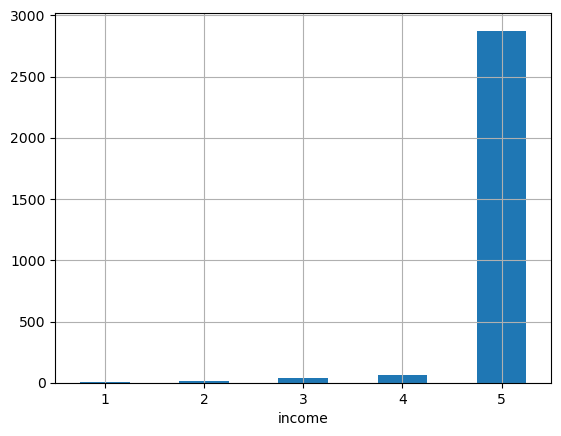

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
df["income"] = pd.cut(df["educational-num"],
                     bins=[0, 1, 2, 3, 4, np.inf],
                     labels=[1, 2, 3, 4, 5])
df["income"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()

<Axes: xlabel='income', ylabel='count'>

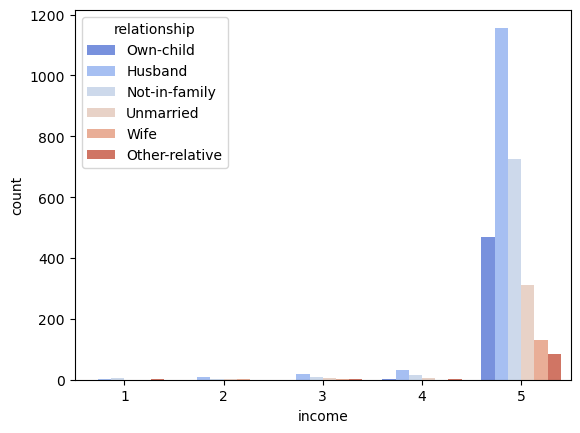

In [23]:
sns.countplot(x='income', data=df, palette='coolwarm', hue='relationship')

In [24]:
#Replace the values with mode
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty') 
df['native-country'] = df['native-country'].replace('?', 'United-States')

In [25]:
df.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18           Private  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29           Private  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married     Prof-specialty      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married     Prof-specialty      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States      5  
1             0             0              50  United-States      5  
2             0             0              40  United-States      5  
3          7688             0              40  United-States      5  
4             0             0              30  United-States      5  
5             0             0              30  United-States      5  
6             0             0              40  United-States      5  
7          3103             0              32  United-States      5  
8             0             0              40  United-States      5  
9             0             0              10  United-States      4

In [26]:
#Education Category

df.education = df.education.replace(['Preschool', '1st-4th', '7th-8th', '9th', '10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Mastrers', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [27]:
#Marital Status

df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married'], 'not-married')
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'],"others")

In [28]:
#Income

df.income = df.income.replace('<=50k', 0)
df.income = df.income.replace('>50k', 1)

In [29]:
df.head(10)

age         workclass  fnlwgt    education  educational-num marital-status  \
0   25           Private  226802       school                7    not-married   
1   38           Private   89814  high school                9        married   
2   28         Local-gov  336951       higher               12        married   
3   44           Private  160323       higher               10        married   
4   18           Private  103497       higher               10    not-married   
5   34           Private  198693       school                6    not-married   
6   29           Private  227026  high school                9    not-married   
7   63  Self-emp-not-inc  104626       higher               15        married   
8   24           Private  369667       higher               10    not-married   
9   55           Private  104996       school                4        married   

          occupation   relationship   race  gender  capital-gain  \
0  Machine-op-inspct      Own-child  Black    Male             0   
1    Farming-fishing        Husband  White    Male             0   
2    Protective-serv        Husband  White    Male             0   
3  Machine-op-inspct        Husband  Black    Male          7688   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service  Not-in-family  White    Male             0   
6     Prof-specialty      Unmarried  Black    Male             0   
7     Prof-specialty        Husband  White    Male          3103   
8      Other-service      Unmarried  White  Female             0   
9       Craft-repair        Husband  White    Male             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States      5  
1             0              50  United-States      5  
2             0              40  United-States      5  
3             0              40  United-States      5  
4             0              30  United-States      5  
5             0              30  United-States      5  
6             0              40  United-States      5  
7             0              32  United-States      5  
8             0              40  United-States      5  
9             0              10  United-States      4

In [30]:
df['education'].value_counts()

education
high school    949
higher         913
undergrad      514
school         372
Masters        181
5th-6th         39
doc             31
Name: count, dtype: int64

In [31]:
numeric_df = df.select_dtypes(include='number')


In [32]:
corr_matrix = numeric_df.corr()


<Axes: >

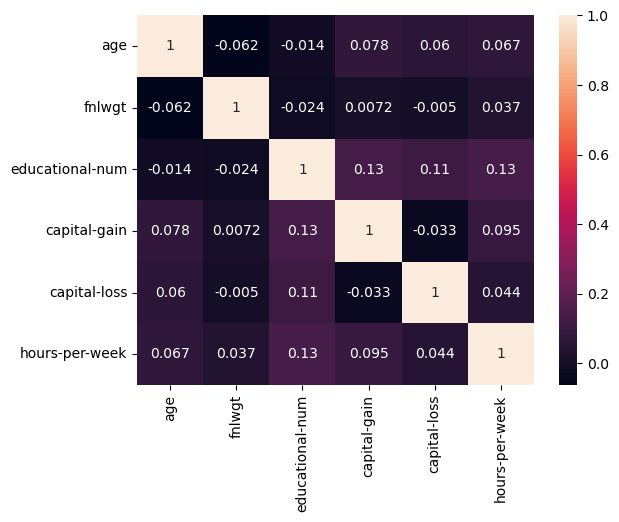

In [33]:
sns.heatmap(corr_matrix, annot=True)

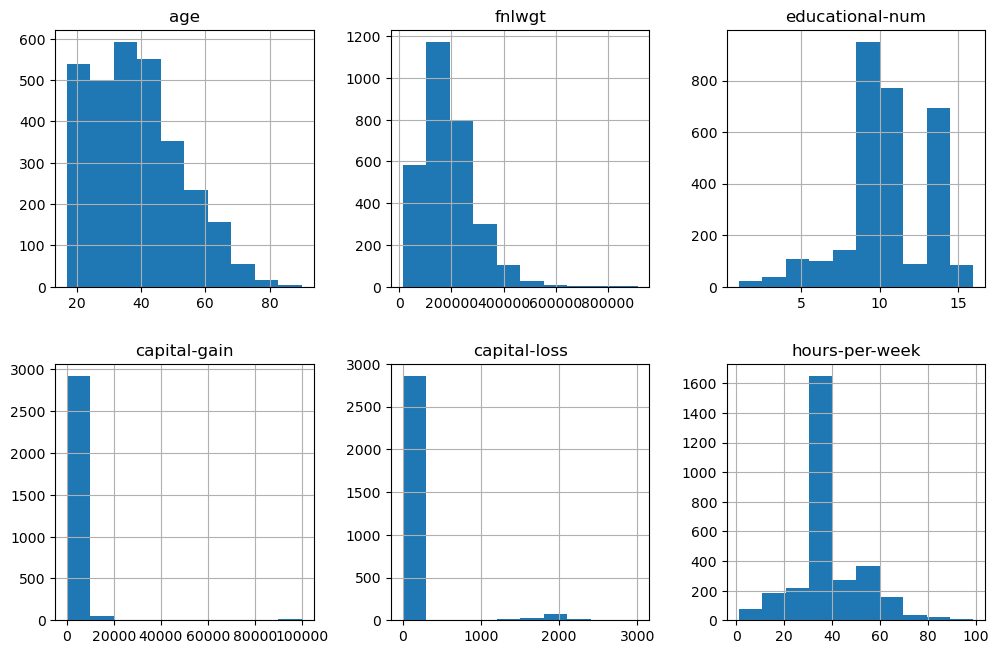

In [34]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

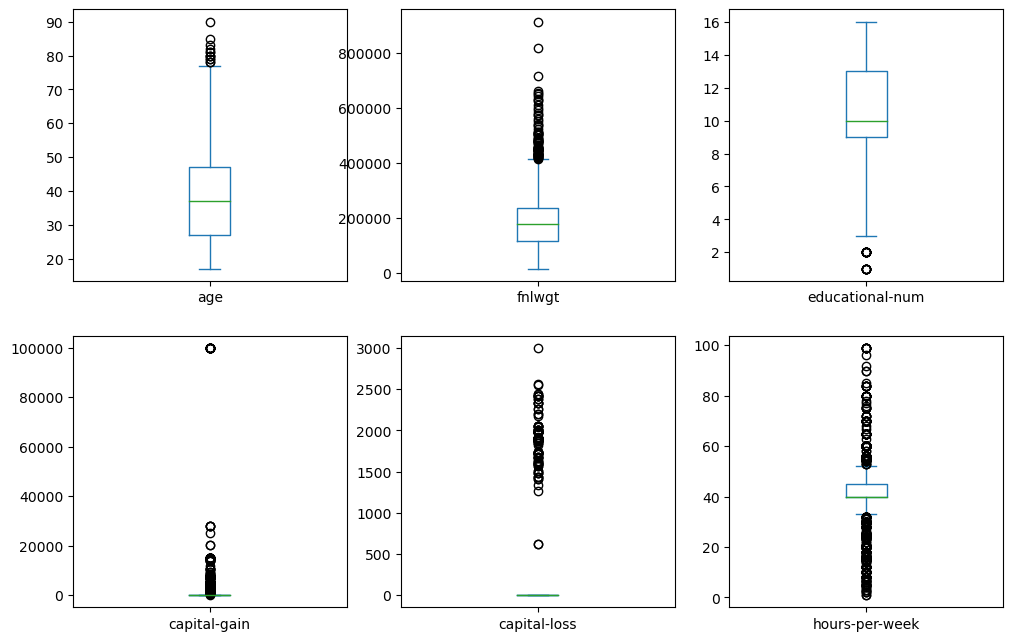

In [35]:
df.plot(kind='box', figsize=(12,12), layout=(3,3),sharex=False, subplots=True);

<Axes: xlabel='education', ylabel='count'>

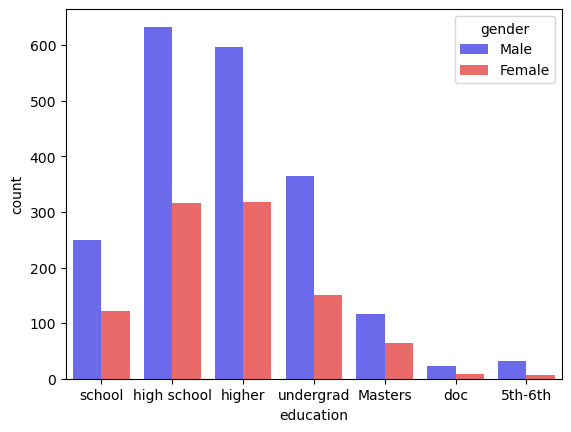

In [36]:
sns.countplot(x='education', hue='gender', data=df, palette='seismic')

In [37]:
x=df.drop(['income'], axis=1)
y= df['income']

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [39]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head(20)

age  workclass  fnlwgt  education  educational-num  marital-status  \
0     8          2    2047          5                6               1   
1    21          2     408          3                8               0   
2    11          1    2605          4               11               0   
3    27          2    1152          4                9               0   
4     1          2     531          4                9               1   
5    17          2    1730          5                5               1   
6    12          2    2052          3                8               1   
7    46          4     549          4               14               0   
8     7          2    2687          4                9               1   
9    38          2     554          5                3               0   
10   48          2    1486          3                8               0   
11   19          0    1903          6               12               0   
12    9          2     366          3                8               1   
13   41          2    2471          3                8               0   
14   31          2    2387          3                8               0   
15   26          2    2635          1               13               0   
16    3          5    2782          4                9               1   
17   26          2     822          3                8               0   
18   20          2     260          3                8               2   
19   23          2     383          2               15               0   

    occupation  relationship  race  gender  capital-gain  capital-loss  \
0            6             3     2       1             0             0   
1            4             0     4       1             0             0   
2           10             0     4       1             0             0   
3            6             0     2       1            56             0   
4            9             3     4       0             0             0   
5            7             1     4       1             0             0   
6            9             4     2       1             0             0   
7            9             0     4       1            30             0   
8            7             4     4       0             0             0   
9            2             0     4       1             0             0   
10           6             0     4       1            52             0   
11           0             0     4       1             0             0   
12           0             1     4       0             0             0   
13           9             0     4       1             0             0   
14           6             0     4       1            30             0   
15           3             0     4       1             0             0   
16           7             3     4       1             0             0   
17           0             5     4       0             0             0   
18           6             4     4       0             0             0   
19           9             0     1       1             0             0   

    hours-per-week  native-country  income  
0               36              34       4  
1               46              34       4  
2               36              34       4  
3               36              34       4  
4               26              34       4  
5               26              34       4  
6               36              34       4  
7               28              34       4  
8               36              34       4  
9                8              34       3  
10              36              34       4  
11              36              34       4  
12              35              34       4  
13              31              34       4  
14              44              34       4  
15              46              34       4  
16              21              34       4  
17              26              34       4  
18              16              34     

In [40]:
ss=StandardScaler().fit(df1.drop('income',axis=1))

In [41]:
X=ss.transform(df1.drop('income',axis=1))
y=df['income']

In [42]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, test_size=0.3, stratify=df["income"], random_state=40)

In [43]:
train['income'].value_counts() / len(train['income'])


income
5    0.958552
4    0.021439
3    0.012863
2    0.004288
1    0.002859
Name: count, dtype: float64

In [45]:
test['income'].value_counts() / len(test['income'])


income
5    0.958889
4    0.021111
3    0.013333
2    0.004444
1    0.002222
Name: count, dtype: float64

In [46]:
train.drop('income',  axis=1, inplace=True)

In [47]:
test.drop('income',  axis=1, inplace=True)

In [48]:
train.head()

age workclass  fnlwgt    education  educational-num marital-status  \
2963   57   Private  259010       higher               10        married   
666    47   Private  265097  high school                9        married   
1816   48   Private  158685  high school                9         others   
905    41   Private  143069          doc               16        married   
1409   43   Private  122473      Masters               14        married   

             occupation   relationship   race  gender  capital-gain  \
2963   Transport-moving        Husband  White    Male             0   
666   Machine-op-inspct        Husband  White    Male             0   
1816      Other-service  Not-in-family  White  Female             0   
905      Prof-specialty        Husband  White    Male             0   
1409    Exec-managerial           Wife  Black  Female             0   

      capital-loss  hours-per-week native-country  
2963             0              84  United-States  
666              0              40  United-States  
1816             0              16  United-States  
905              0              60  United-States  
1409          1977              50  United-States

In [49]:
#corr_matrix = numeric_df.corr()
corr_matrix = train.corr(numeric_only= True)
corr_matrix["fnlwgt"].sort_values(ascending= False)

fnlwgt             1.000000
hours-per-week     0.043954
capital-gain       0.010086
capital-loss       0.000172
educational-num   -0.026769
age               -0.062016
Name: fnlwgt, dtype: float64

<Axes: >

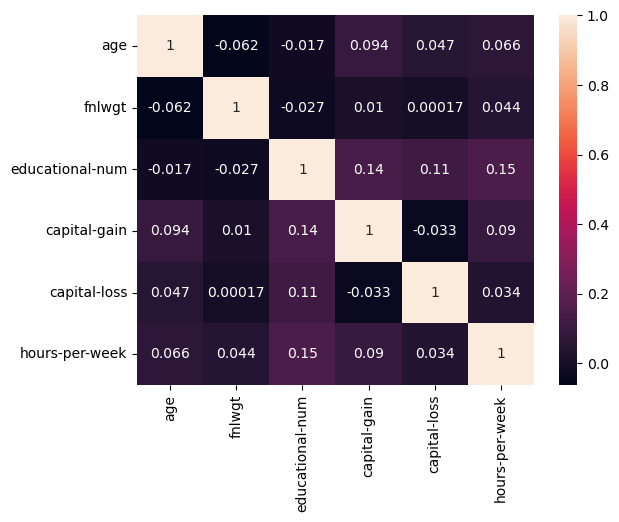

In [50]:
sns.heatmap(corr_matrix, annot=True)

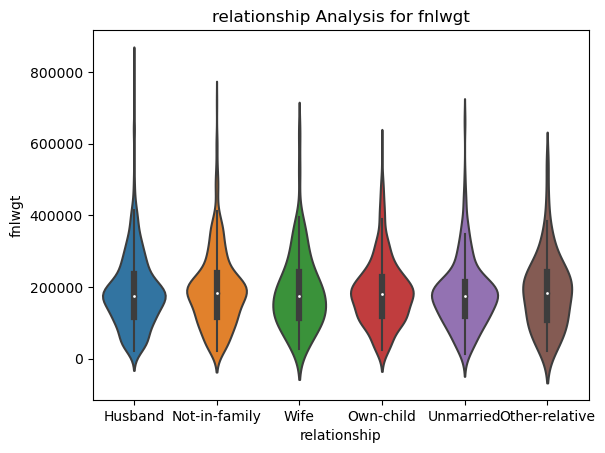

In [51]:
plt.title('relationship Analysis for fnlwgt')
sns.violinplot(x='relationship',y='fnlwgt', data =train)
plt.show()

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin):
    # Train our custom preprocessors

    numerical_columns = [
        'age',
        'fnlwgt',
        'educational-num',
        'capital-gain',
        'capital-loss',
        'hours-per-week'
    ]

    categorical_columns = [
        'workclass',
        'education',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'gender',
        'native-country'
    ]

    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])

        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns])

        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])

        return self

    def transform(self, X):
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])

        transformed_df = X.copy()

        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])

        # Drop existing categorical columns and replace with one-hot equivalent
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)

        return transformed_df

In [53]:
preprocessor = Preprocessor()
preprocessor.fit(train)
preprocessor.transform(train)

age    fnlwgt  educational-num  capital-gain  capital-loss  \
2963  1.340927  0.716275        -0.023318     -0.153628     -0.216401   
666   0.611244  0.776626        -0.399813     -0.153628     -0.216401   
1816  0.684212 -0.278422        -0.399813     -0.153628     -0.216401   
905   0.173434 -0.433251         2.235650     -0.153628     -0.216401   
1409  0.319371 -0.637455         1.482661     -0.153628      4.671685   
...        ...       ...              ...           ...           ...   
263  -0.921090 -0.541222         1.106166     -0.153628     -0.216401   
2645  1.413895 -0.012965        -1.152802     -0.153628     -0.216401   
239  -0.556249 -0.826211        -0.399813     -0.153628     -0.216401   
998   0.100466 -0.659227         1.106166     -0.153628     -0.216401   
1612 -1.358900 -0.626915        -0.023318     -0.153628     -0.216401   

      hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
2963        3.596907                      0                    0   
666        -0.019067                      0                    0   
1816       -1.991417                      0                    0   
905         1.624558                      0                    0   
1409        0.802745                      0                    0   
...              ...                    ...                  ...   
263        -0.019067                      0                    0   
2645       -0.019067                      0                    0   
239        -0.019067                      0                    0   
998         0.391839                      0                    0   
1612       -0.019067                      0                    0   

      workclass_Private  workclass_Self-emp-inc  ...  native-country_Poland  \
2963                  1                       0  ...                      0   
666                   1                       0  ...                      0   
1816                  1                       0  ...                      0   
905                   1                       0  ...                      0   
1409                  1                       0  ...                      0   
...                 ...                     ...  ...                    ...   
263                   1                       0  ...                      0   
2645                  1                       0  ...                      0   
239                   1                       0  ...                      0   
998                   1                       0  ...                      0   
1612                  1                       0  ...                      0   

      native-country_Portugal  native-country_Puerto-Rico  \
2963                        0                           0   
666                         0                           0   
1816                        0                           0   
905                         0                           0   
1409                        0                           0   
...                       ...                         ...   
263                         0                           0   
2645                        0                           0   
239                         0                           0   
998                         0                           0   
1612                        0                           0   

      native-country_Scotland  native-country_South  native-country_Taiwan  \
2963                        0                     0                      0   
666                         0                     0                      0   
1816                        0                     0                      0   
905                         0                     0                      0   
1409                        0                     0                      0   
...                       ...                   ...                    ...   
263                         0                     0                      0   
2645       

In [54]:
train_fixed = preprocessor.transform(train)
train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2099 entries, 2963 to 1612
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                2099 non-null   float64
 1   fnlwgt                             2099 non-null   float64
 2   educational-num                    2099 non-null   float64
 3   capital-gain                       2099 non-null   float64
 4   capital-loss                       2099 non-null   float64
 5   hours-per-week                     2099 non-null   float64
 6   workclass_Federal-gov              2099 non-null   int32  
 7   workclass_Local-gov                2099 non-null   int32  
 8   workclass_Private                  2099 non-null   int32  
 9   workclass_Self-emp-inc             2099 non-null   int32  
 10  workclass_Self-emp-not-inc         2099 non-null   int32  
 11  workclass_State-gov                2099 non-null   int32  

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(Preprocessor(), RandomForestRegressor())

In [56]:
rfr

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor', RandomForestRegressor())])

In [57]:
y_train = train['fnlwgt']
X_train = train.drop('fnlwgt',axis=1)


In [58]:
y_train = train['fnlwgt']  # Target variable
X_train = train.copy()  # Keep all columns in X_train

In [61]:
rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('randomforestregressor', RandomForestRegressor())])

In [60]:
params = rfr.get_params()
params

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': Fal

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_train_hat = rfr.predict(X_train)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_hat)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 1722.8977806050107
Mean Absolute Error (MAE): 144.01797522629838


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=40)

In [64]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression() 
model = lr.fit(X_train, y_train) 
prediction = model.predict(X_test)  
accuracy = accuracy_score(y_test, prediction) 
print("Accuracy:", accuracy)

Accuracy: 0.9922222222222222


In [65]:
print("ACCURACY on training data: {:.3f}".format(lr.score(X_train,y_train)))
print("ACCURACY on test data: {:.3f}".format(lr.score(X_test,y_test)))


ACCURACY on training data: 0.996
ACCURACY on test data: 0.992


In [66]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

accuracy_score(y_test,prediction1)


1.0

In [55]:
print("ACCURACY on training data:", rfc.score(X_train, y_train))
print("ACCURACY on test data:", rfc.score(X_test, y_test))

ACCURACY on training data: 1.0
ACCURACY on test data: 0.8277777777777777


In [56]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model2 = dtc.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
accuracy_score(y_test, prediction2)

0.8011111111111111

In [57]:
print("ACCURACY on training set: {:,.3f}".format(dtc.score(X_train, y_train)))
print("ACCURACY on test set: {:,.3f}".format(dtc.score(X_test, y_test)))

ACCURACY on training set: 1.000
ACCURACY on test set: 0.801


In [68]:
#SUPPORT VECTOR CLASSIFIER (SVC/SVM)
from sklearn.svm import SVC

svm = SVC()

model3 = svm.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
accuracy_score(y_test,prediction3)

0.9833333333333333

In [69]:
print("ACCURACY on training set:{:,.3f}".format(svm.score(X_train,y_train)))
print("ACCURACY on test set: {:,.3f}".format(svm.score(X_test,y_test)))

ACCURACY on training set:0.992
ACCURACY on test set: 0.983


In [122]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Instead of DecisionTree
from sklearn.svm import SVC  # Instead of SupportVectorClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA
import mlflow
import mlflow.sklearn
import numpy as np
import os
import time

In [82]:
!pip install mlflow

In [123]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Instead of DecisionTree
from sklearn.svm import SVC  # Instead of SupportVectorClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, roc_curve, auc, confusion_matrix
import numpy as np
import os
     

In [124]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import random
np.random.seed(12345)

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [125]:
import sqlite3
import pandas as pd

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Exception as e:
        print(e)

def execute_sql_statement(sql_statement, conn):
    try:
        c = conn.cursor()
        c.execute(sql_statement)
        data = c.fetchall()
        return data
    except Exception as e:
        print(e)

def normalize_database(data_filename):
    global conn
    conn = sqlite3.connect('normalized.db')
    cur = conn.cursor()

    df = pd.read_csv(data_filename)

    with conn:
        create_table_sql1 = "CREATE TABLE IF NOT EXISTS Workclass (Workclass_id INTEGER PRIMARY KEY, Workclass TEXT NOT NULL);"
        create_table(conn, create_table_sql1)

        create_table_sql2 = "CREATE TABLE IF NOT EXISTS Education (Education_id INTEGER PRIMARY KEY, Education TEXT NOT NULL);"
        create_table(conn, create_table_sql2)

        create_table_sql3 = "CREATE TABLE IF NOT EXISTS MaritalStatus (MaritalStatus_id INTEGER PRIMARY KEY, MaritalStatus TEXT NOT NULL);"
        create_table(conn, create_table_sql3)

        create_table_sql4 = "CREATE TABLE IF NOT EXISTS Occupation (Occupation_id INTEGER PRIMARY KEY, Occupation TEXT NOT NULL);"
        create_table(conn, create_table_sql4)

        create_table_sql5 = "CREATE TABLE IF NOT EXISTS Relationship (Relationship_id INTEGER PRIMARY KEY, Relationship TEXT NOT NULL);"
        create_table(conn, create_table_sql5)

        create_table_sql6 = "CREATE TABLE IF NOT EXISTS Race (Race_id INTEGER PRIMARY KEY, Race TEXT NOT NULL);"
        create_table(conn, create_table_sql6)

        create_table_sql7 = "CREATE TABLE IF NOT EXISTS Gender (Gender_id INTEGER PRIMARY KEY, Gender TEXT NOT NULL);"
        create_table(conn, create_table_sql7)

        create_table_sql8 = "CREATE TABLE IF NOT EXISTS NativeCountry (NativeCountry_id INTEGER PRIMARY KEY, NativeCountry TEXT NOT NULL);"
        create_table(conn, create_table_sql8)

        create_table_sql9 = "CREATE TABLE IF NOT EXISTS Income (Income_id INTEGER PRIMARY KEY, Income TEXT NOT NULL);"
        create_table(conn, create_table_sql9)

    workclass = set(df['workclass'])
    with conn:
        for idx, value in enumerate(workclass):
            cur.execute("INSERT OR REPLACE INTO Workclass (Workclass_id, Workclass) VALUES (?, ?)", (idx + 1, value))

    education = set(df['education'])
    with conn:
        for idx, value in enumerate(education):
            cur.execute("INSERT OR REPLACE INTO Education (Education_id, Education) VALUES (?, ?)", (idx + 1, value))

    marital_status = set(df['marital-status'])
    with conn:
        for idx, value in enumerate(marital_status):
            cur.execute("INSERT OR REPLACE INTO MaritalStatus (MaritalStatus_id, MaritalStatus) VALUES (?, ?)", (idx + 1, value))

    occupation = set(df['occupation'])
    with conn:
        for idx, value in enumerate(occupation):
            cur.execute("INSERT OR REPLACE INTO Occupation (Occupation_id, Occupation) VALUES (?, ?)", (idx + 1, value))

    relationship = set(df['relationship'])
    with conn:
        for idx, value in enumerate(relationship):
            cur.execute("INSERT OR REPLACE INTO Relationship (Relationship_id, Relationship) VALUES (?, ?)", (idx + 1, value))

    race = set(df['race'])
    with conn:
        for idx, value in enumerate(race):
            cur.execute("INSERT OR REPLACE INTO Race (Race_id, Race) VALUES (?, ?)", (idx + 1, value))

    gender = set(df['gender'])
    with conn:
        for idx, value in enumerate(gender):
            cur.execute("INSERT OR REPLACE INTO Gender (Gender_id, Gender) VALUES (?, ?)", (idx + 1, value))

    native_country = set(df['native-country'])
    with conn:
        for idx, value in enumerate(native_country):
            cur.execute("INSERT OR REPLACE INTO NativeCountry (NativeCountry_id, NativeCountry) VALUES (?, ?)", (idx + 1, value))

    income = set(df['income'])
    with conn:
        for idx, value in enumerate(income):
            cur.execute("INSERT OR REPLACE INTO Income (Income_id, Income) VALUES (?, ?)", (idx + 1, value))

    with conn:
        drop_table = "DROP TABLE IF EXISTS Employee_Data;"
        execute_sql_statement(drop_table, conn)
        create_table_sql = """
            CREATE TABLE IF NOT EXISTS Employee_Data (
                Age INTEGER NOT NULL,
                Workclass INTEGER NOT NULL,
                FnlWgt INTEGER NOT NULL,
                Education INTEGER NOT NULL,
                EducationNum INTEGER NOT NULL,
                MaritalStatus INTEGER NOT NULL,
                Occupation INTEGER NOT NULL,
                Relationship INTEGER NOT NULL,
                Race INTEGER NOT NULL,
                Gender INTEGER NOT NULL,
                CapitalGain INTEGER NOT NULL,
                CapitalLoss INTEGER NOT NULL,
                HoursPerWeek INTEGER NOT NULL,
                NativeCountry INTEGER NOT NULL,
                Income INTEGER NOT NULL
            );
        """
        execute_sql_statement(create_table_sql, conn)

    final = []
    for index, row in df.iterrows():
        final.append(tuple(row))

    with conn:
        for row in final:
            conn.execute("""
                INSERT INTO Employee_Data (
                    Age, Workclass, FnlWgt, Education, EducationNum, MaritalStatus, Occupation,
                    Relationship, Race, Gender, CapitalGain, CapitalLoss, HoursPerWeek,
                    NativeCountry, Income
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """, row)

    stmt = "SELECT * FROM Employee_Data;"
    df1 = pd.read_sql_query(stmt, conn)

    sex_mapping = {'Male': 1, 'Female': 0}
    df1['Gender'] = df1['Gender'].map(sex_mapping)

    display(df1)

# Call the function with the filename of your dataset
normalize_database("Adultincome.csv")

Age  Workclass  FnlWgt     Education  EducationNum       MaritalStatus  \
0      25    Private  226802          11th             7       Never-married   
1      38    Private   89814       HS-grad             9  Married-civ-spouse   
2      28  Local-gov  336951    Assoc-acdm            12  Married-civ-spouse   
3      44    Private  160323  Some-college            10  Married-civ-spouse   
4      18          ?  103497  Some-college            10       Never-married   
...   ...        ...     ...           ...           ...                 ...   
2994   25    Private  120268       HS-grad             9       Never-married   
2995   22          ?   60331  Some-college            10  Married-civ-spouse   
2996   59    Private  172618  Some-college            10            Divorced   
2997   36  State-gov  173273       Masters            14       Never-married   
2998   25    Private   52921    Assoc-acdm            12  Married-civ-spouse   

             Occupation   Relationship   Race  Gender  CapitalGain  \
0     Machine-op-inspct      Own-child  Black       1            0   
1       Farming-fishing        Husband  White       1            0   
2       Protective-serv        Husband  White       1            0   
3     Machine-op-inspct        Husband  Black       1         7688   
4                     ?      Own-child  White       0            0   
...                 ...            ...    ...     ...          ...   
2994              Sales      Own-child  White       1            0   
2995                  ?        Husband  White       1            0   
2996              Sales  Not-in-family  White       1            0   
2997     Prof-specialty  Not-in-family  Black       0            0   
2998              Sales        Husband  White       1            0   

      CapitalLoss  HoursPerWeek  NativeCountry Income  
0               0            40  United-States  <=50K  
1               0            50  United-States  <=50K  
2               0            40  United-States   >50K  
3               0            40  United-States   >50K  
4               0            30  United-States  <=50K  
...           ...           ...            ...    ...  
2994         1741            40  United-States  <=50K  
2995            0            10  United-States  <=50K  
2996            0            56  United-States  <=50K  
2997            0            40  United-States  <=50K  
2998            0            45  United-States  <=50K  

[2999 rows x 15 columns]

In [126]:
df.describe()

income
count     0.0
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN

In [127]:
import sqlite3

# Establish a connection to your database
conn = sqlite3.connect('normalized.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Create a table to store the data
create_table_sql = """
CREATE TABLE IF NOT EXISTS Employee_Data (
    Age INTEGER,
    Workclass TEXT,
    FnlWgt INTEGER,
    Education TEXT,
    EducationalNum INTEGER,
    MaritalStatus TEXT,
    Occupation TEXT,
    Relationship TEXT,
    Race TEXT,
    Gender TEXT,
    CapitalGain INTEGER,
    CapitalLoss INTEGER,
    HoursPerWeek INTEGER,
    NativeCountry TEXT,
    Income TEXT
);
"""
cursor.execute(create_table_sql)

# Insert the data into the table
data = [
    (25, 'Private', 226802, '11th', 7, 'Never-married', 'Machine-op-inspct', 'Own-child', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K'),
    (38, 'Private', 89814, 'HS-grad', 9, 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'White', 'Male', 0, 0, 50, 'United-States', '<=50K'),
    # Continue adding the rest of the data...
]

# Insert each row of data into the table
for row in data:
    cursor.execute("INSERT INTO Employee_Data VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", row)

# Commit the changes to the database
conn.commit()

# Close the connection
conn.close()


In [128]:
import csv
# Step 1: Read CSV File
data = []
with open('Adultincome.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        data.append(row)

# Step 2: Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

In [129]:
df

age  workclass  fnlwgt     education educational-num      marital-status  \
0     25    Private  226802          11th               7       Never-married   
1     38    Private   89814       HS-grad               9  Married-civ-spouse   
2     28  Local-gov  336951    Assoc-acdm              12  Married-civ-spouse   
3     44    Private  160323  Some-college              10  Married-civ-spouse   
4     18          ?  103497  Some-college              10       Never-married   
...   ..        ...     ...           ...             ...                 ...   
2994  25    Private  120268       HS-grad               9       Never-married   
2995  22          ?   60331  Some-college              10  Married-civ-spouse   
2996  59    Private  172618  Some-college              10            Divorced   
2997  36  State-gov  173273       Masters              14       Never-married   
2998  25    Private   52921    Assoc-acdm              12  Married-civ-spouse   

             occupation   relationship   race  gender capital-gain  \
0     Machine-op-inspct      Own-child  Black    Male            0   
1       Farming-fishing        Husband  White    Male            0   
2       Protective-serv        Husband  White    Male            0   
3     Machine-op-inspct        Husband  Black    Male         7688   
4                     ?      Own-child  White  Female            0   
...                 ...            ...    ...     ...          ...   
2994              Sales      Own-child  White    Male            0   
2995                  ?        Husband  White    Male            0   
2996              Sales  Not-in-family  White    Male            0   
2997     Prof-specialty  Not-in-family  Black  Female            0   
2998              Sales        Husband  White    Male            0   

     capital-loss hours-per-week native-country income  
0               0             40  United-States  <=50K  
1               0             50  United-States  <=50K  
2               0             40  United-States   >50K  
3               0             40  United-States   >50K  
4               0             30  United-States  <=50K  
...           ...            ...            ...    ...  
2994         1741             40  United-States  <=50K  
2995            0             10  United-States  <=50K  
2996            0             56  United-States  <=50K  
2997            0             40  United-States  <=50K  
2998            0             45  United-States  <=50K  

[2999 rows x 15 columns]

In [130]:

df['income'] = df['income'].map({'Yes':1, 'No': 0})

In [131]:
!pip install mlflow
     

In [132]:
!pip install -q dagshub mlflow

In [133]:
import dagshub
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")

Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

In [137]:
import dagshub
import mlflow
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Initialize MLflow to track experiments
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")
mlflow.set_experiment('LogisticRegression')

# Load the dataset (replace the path with your dataset)
data_path = "Adultincome.csv"
data = pd.read_csv(data_path)

# Encode the target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target variable
X = data[['capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),
    ('model', LogisticRegression())
])

# Fit preprocessing pipeline
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model selection pipeline
with mlflow.start_run(run_name="Model_Selection", nested=True):
    model_selection_pipeline.fit(X_train_transformed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

# Evaluate model
y_pred_proba = model_selection_pipeline.predict_proba(X_test_transformed)[:, 1]  # Probability of positive class
y_pred = np.where(y_pred_proba > 0.5, 1, 0)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation", nested=True):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])
    mlflow.set_tag('Training info', 'Base Model')

# Save confusion matrix to a file
conf_matrix_path = "confusion_matrix.npy"
np.save(conf_matrix_path, conf_matrix)

# Log confusion matrix file as an artifact
mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")

# End the active MLflow run
mlflow.end_run()


Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

In [142]:
import dagshub
import mlflow
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize MLflow to track experiments
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")
mlflow.set_experiment('RandomForest')

# Load the dataset
data_path = "Adultincome.csv"  # Replace with the actual path
data = pd.read_csv(data_path)

# Encode target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target variable

X = data[['capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('model', RandomForestClassifier())
])

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model
with mlflow.start_run(run_name="RandomForest_Model"):
    model_selection_pipeline.fit(X_train_preprocessed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")


Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

In [145]:
import dagshub
import mlflow
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize MLflow to track experiments
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")
mlflow.set_experiment('DecisionTree')

# Load the dataset
data_path = "Adultincome.csv"  # Replace with the actual path
data = pd.read_csv(data_path)

# Encode target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target variable
X = data[['capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('model', DecisionTreeClassifier())  # Use DecisionTreeClassifier
])

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model
with mlflow.start_run(run_name="DecisionTree_Model"):
    model_selection_pipeline.fit(X_train_preprocessed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")


Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

In [144]:
import dagshub
import mlflow
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC  # Import Support Vector Classifier (SVC)
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize MLflow to track experiments
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")
mlflow.set_experiment('SVC')

# Load the dataset
data_path = "Adultincome.csv"  # Replace with the actual path
data = pd.read_csv(data_path)

# Encode target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target variable
X = data[['capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('model', SVC())  # Use Support Vector Classifier (SVC)
])

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model
with mlflow.start_run(run_name="SVC_Model"):
    model_selection_pipeline.fit(X_train_preprocessed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")


Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

2024/05/16 16:41:56 INFO mlflow.tracking.fluent: Experiment with name 'SVC' does not exist. Creating a new experiment.


In [147]:
import dagshub
import mlflow
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize MLflow to track experiments
dagshub.init(repo_owner='vallurun', repo_name='Adultincome', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/vallurun/Adultincome.mlflow")
mlflow.set_experiment('KNN')

# Load the dataset
data_path = "Adultincome.csv"  # Replace with the actual path
data = pd.read_csv(data_path)

# Encode target variable
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])

# Define features and target variable
X = data[['capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('model', KNeighborsClassifier())  # Use K-Nearest Neighbors (KNN) Classifier
])

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model
with mlflow.start_run(run_name="KNN_Model"):
    model_selection_pipeline.fit(X_train_preprocessed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")


Initialized MLflow to track repo "vallurun/Adultincome"

Repository vallurun/Adultincome initialized!

2024/05/16 16:43:55 INFO mlflow.tracking.fluent: Experiment with name 'KNN' does not exist. Creating a new experiment.
